In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sales_data.csv')

In [3]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
df.shape

(1000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [6]:
df.isnull().sum()

,0
Product_ID,0
Sale_Date,0
Sales_Rep,0
Region,0
Sales_Amount,0
Quantity_Sold,0
Product_Category,0
Unit_Cost,0
Unit_Price,0
Customer_Type,0


In [7]:
df.Sales_Rep.unique()

array(['Bob', 'David', 'Charlie', 'Eve', 'Alice'], dtype=object)

In [8]:
df.Sales_Rep.value_counts()

,count
Sales_Rep,
David,222
Eve,209
Bob,208
Alice,192
Charlie,169


In [9]:
df['Region_and_Sales_Rep'].value_counts()

,count
Region_and_Sales_Rep,
North-Eve,64
East-Bob,60
East-David,59
South-David,56
North-David,56
North-Charlie,55
East-Eve,55
West-Bob,54
East-Alice,52


In [10]:
sales_rep = df.groupby(['Sales_Rep', 'Region']).size().reset_index(name='Count')

In [11]:
sales_rep['sales_rep_region'] = sales_rep['Sales_Rep'] + '-' + sales_rep['Region']
sales_rep

,Sales_Rep,Region,Count,sales_rep_region
0,Alice,East,52,Alice-East
1,Alice,North,48,Alice-North
2,Alice,South,45,Alice-South
3,Alice,West,47,Alice-West
4,Bob,East,60,Bob-East
5,Bob,North,44,Bob-North
6,Bob,South,50,Bob-South
7,Bob,West,54,Bob-West
8,Charlie,East,37,Charlie-East
9,Charlie,North,55,Charlie-North


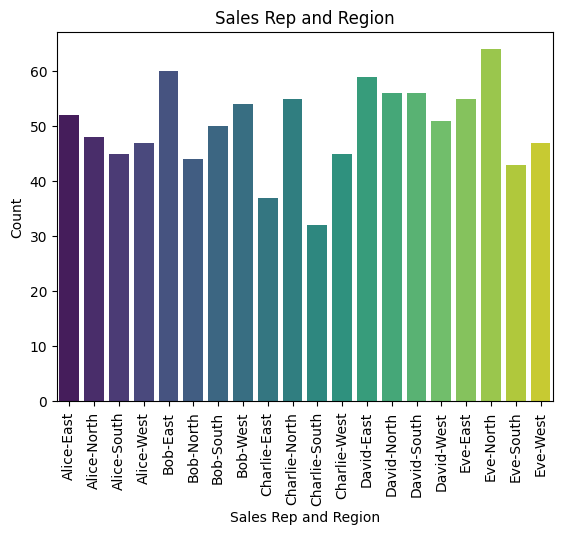

In [12]:
sns.barplot(x= 'sales_rep_region', y= 'Count', data= sales_rep, palette= 'viridis')
plt.xlabel('Sales Rep and Region')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.title('Sales Rep and Region')
plt.show()

In [13]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [14]:
df.Product_Category.unique()

array(['Furniture', 'Food', 'Clothing', 'Electronics'], dtype=object)

In [15]:
df.Customer_Type.unique()

array(['Returning', 'New'], dtype=object)

In [16]:
df.Payment_Method.unique()

array(['Cash', 'Bank Transfer', 'Credit Card'], dtype=object)

In [17]:
df.Sales_Channel.unique()

array(['Online', 'Retail'], dtype=object)

In [18]:
df['Year'] = pd.to_datetime(df['Sale_Date']).dt.year

In [19]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023


In [20]:
df.Year.unique()

array([2023, 2024], dtype=int32)

In [21]:
df.Year.value_counts()

,count
Year,
2023,997
2024,3


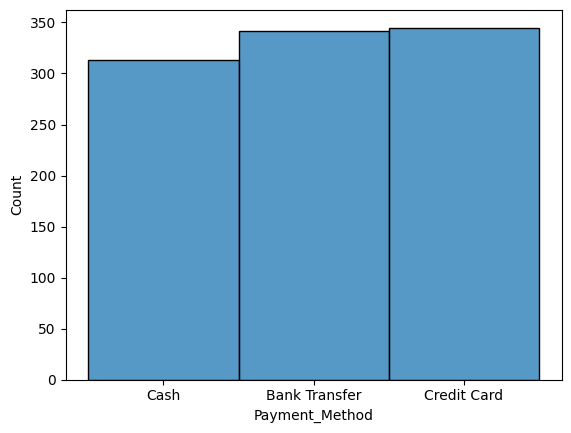

In [22]:
sns.histplot(x= 'Payment_Method', data= df)
plt.show()

From the above graph it can be concluded that Bank Transfer and Credit Card method is the most used Payment Method.

In [23]:
top_selling_prod = df.groupby(['Product_Category', 'Region'])['Sales_Amount'].sum().reset_index()
top_selling_prod

,Product_Category,Region,Sales_Amount
0,Clothing,East,356670.40
1,Clothing,North,372977.22
2,Clothing,South,269517.74
3,Clothing,West,314309.00
4,Electronics,East,303101.42
5,Electronics,North,342666.29
6,Electronics,South,293663.96
7,Electronics,West,304067.97
8,Food,East,325864.87
9,Food,North,258985.65


In [24]:
top_selling_prod = top_selling_prod.sort_values(by= ['Region', 'Sales_Amount'], ascending= [True ,False])
top_selling_prod

,Product_Category,Region,Sales_Amount
0,Clothing,East,356670.40
8,Food,East,325864.87
4,Electronics,East,303101.42
12,Furniture,East,274156.24
13,Furniture,North,394983.35
1,Clothing,North,372977.22
5,Electronics,North,342666.29
9,Food,North,258985.65
10,Food,South,301187.51
6,Electronics,South,293663.96


In [25]:
top_products_each_region = top_selling_prod.groupby('Region').head(1)
top_products_each_region

,Product_Category,Region,Sales_Amount
0,Clothing,East,356670.40
13,Furniture,North,394983.35
10,Food,South,301187.51
11,Food,West,315735.51


In [26]:
top_products_each_region['Product_Category_by_Region'] = top_products_each_region['Product_Category'] + '-' + top_products_each_region['Region']
top_products_each_region

,Product_Category,Region,Sales_Amount,Product_Category_by_Region
0,Clothing,East,356670.40,Clothing-East
13,Furniture,North,394983.35,Furniture-North
10,Food,South,301187.51,Food-South
11,Food,West,315735.51,Food-West


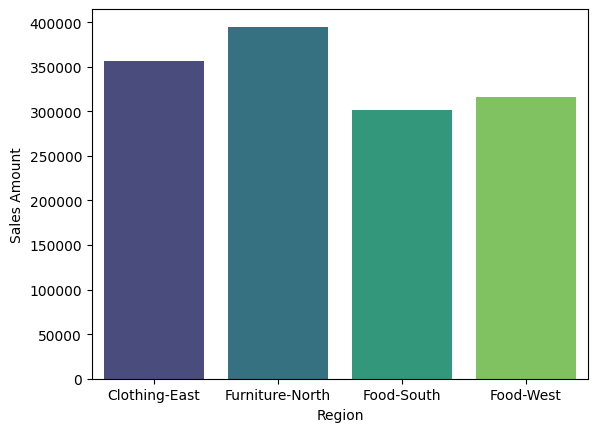

In [27]:
sns.barplot(x= 'Product_Category_by_Region', y= 'Sales_Amount', data= top_products_each_region, palette= 'viridis')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.show()

In [28]:
df['month'] = pd.to_datetime(df['Sale_Date']).dt.month_name()

In [29]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,month
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,February
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,April
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,September
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,August
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,March


In [30]:
df = df[df['Year'] != 2024]

In [31]:
sales_by_month = df.groupby('month')['Sales_Amount'].sum().sort_values(ascending= False).reset_index()
sales_by_month

,month,Sales_Amount
0,January,476092.36
1,November,467482.90
2,October,460378.78
3,August,443171.28
4,April,438992.61
5,June,418458.34
6,March,402638.77
7,December,392643.58
8,May,389078.76
9,July,374242.88


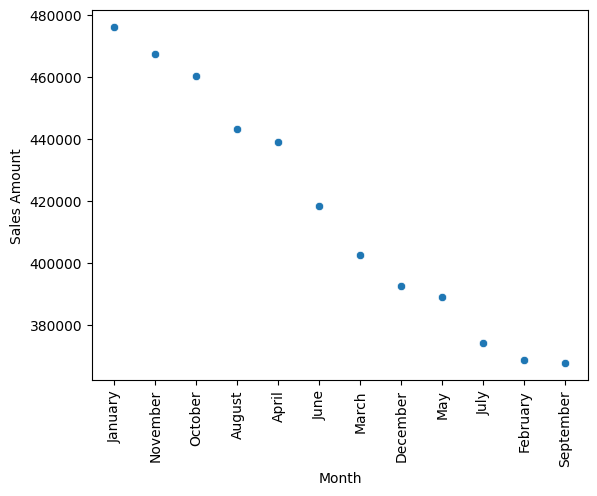

In [32]:
sns.scatterplot(x= 'month', y= 'Sales_Amount', data= sales_by_month, palette= 'viridis')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation = 90)
plt.show()

In [33]:
df_prod_sales_by_category_over_month = df.groupby(['Product_Category', 'month'])['Sales_Amount'].sum().sort_values(ascending= False).reset_index()
df_prod_sales_by_category_over_month

,Product_Category,month,Sales_Amount
0,Food,November,164349.34
1,Furniture,January,162293.63
2,Clothing,August,148120.35
3,Furniture,June,147242.38
4,Electronics,October,132904.61
5,Clothing,January,130507.06
6,Clothing,March,128934.01
7,Electronics,April,127514.53
8,Food,April,126410.50
9,Electronics,June,123107.56


In [34]:
df_prod_sales_by_category_over_month = df_prod_sales_by_category_over_month.groupby('month').head(1)
df_prod_sales_by_category_over_month

,Product_Category,month,Sales_Amount
0,Food,November,164349.34
1,Furniture,January,162293.63
2,Clothing,August,148120.35
3,Furniture,June,147242.38
4,Electronics,October,132904.61
6,Clothing,March,128934.01
7,Electronics,April,127514.53
10,Furniture,May,121873.76
14,Electronics,July,112643.73
16,Clothing,December,110669.33


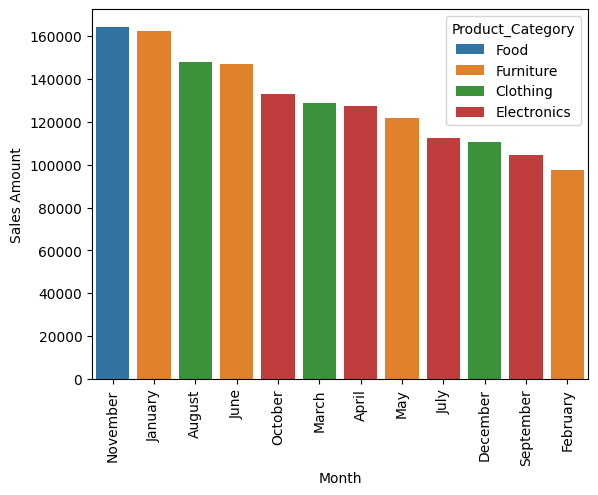

In [35]:
sns.barplot(x= 'month', y= 'Sales_Amount', data= df_prod_sales_by_category_over_month, hue= 'Product_Category')
plt.xlabel('Month')
plt.xticks(rotation= 90)
plt.ylabel('Sales Amount')
plt.show()

In [36]:
df.shape

(997, 16)

In [37]:
df.Year.unique()

array([2023], dtype=int32)

In [38]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,month
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,February
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,April
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,September
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,August
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,March


In [39]:
import scipy.stats as stats

In [40]:
f_value, p_value = stats.f_oneway(df[df['Product_Category'] == 'Furniture']['Sales_Amount'],
                                  df[df['Product_Category'] == 'Food']['Sales_Amount'])

In [41]:
f_value

3.1248772733673738

In [42]:
p_value

0.0777369865925525

In [43]:
df.Product_Category.unique()

array(['Furniture', 'Food', 'Clothing', 'Electronics'], dtype=object)

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
model = ols('Sales_Amount ~ C(Product_Category)', data= df).fit()

In [46]:
annova_table = sm.stats.anova_lm(model, typ= 2)

In [47]:
annova_table

,sum_sq,df,F,PR(>F)
C(Product_Category),2.910331e+07,3.0,1.198752,0.309079
Residual,8.036018e+09,993.0,NaN,NaN


In [48]:
product_categoriesd_high_margin = df.groupby(['Product_Category'])['Sales_Amount'].sum().sort_values(ascending= False).reset_index()
product_categoriesd_high_margin

,Product_Category,Sales_Amount
0,Clothing,1311103.64
1,Furniture,1260517.69
2,Electronics,1234919.92
3,Food,1193395.97


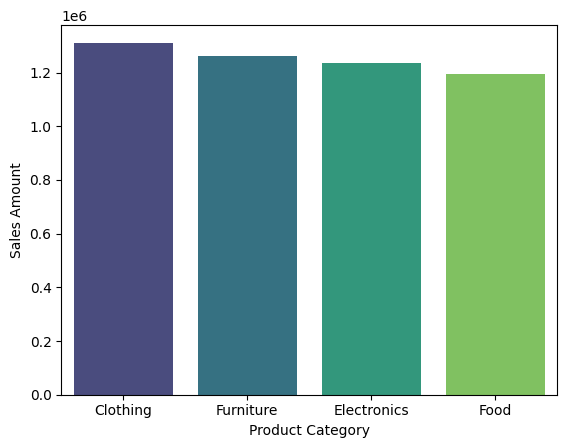

In [49]:
sns.barplot(x= 'Product_Category', y= 'Sales_Amount', data= product_categoriesd_high_margin, palette= 'viridis')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.show()

In [50]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,month
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,February
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,April
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,September
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,August
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,March


In [51]:
payment_method_popularity = df.groupby(['Payment_Method', 'Customer_Type', 'Region'])['Sales_Amount'].sum().reset_index()
payment_method_popularity

,Payment_Method,Customer_Type,Region,Sales_Amount
0,Bank Transfer,New,East,270233.11
1,Bank Transfer,New,North,226485.56
2,Bank Transfer,New,South,187660.35
3,Bank Transfer,New,West,196819.76
4,Bank Transfer,Returning,East,154858.76
5,Bank Transfer,Returning,North,209781.71
6,Bank Transfer,Returning,South,237734.56
7,Bank Transfer,Returning,West,222838.92
8,Cash,New,East,222523.84
9,Cash,New,North,238672.05


In [52]:
payment_method_popularity.sort_values(by= ['Customer_Type', 'Region', 'Sales_Amount'], ascending= [True, True, False])

,Payment_Method,Customer_Type,Region,Sales_Amount
0,Bank Transfer,New,East,270233.11
8,Cash,New,East,222523.84
16,Credit Card,New,East,186231.14
17,Credit Card,New,North,297353.74
9,Cash,New,North,238672.05
1,Bank Transfer,New,North,226485.56
2,Bank Transfer,New,South,187660.35
10,Cash,New,South,166154.93
18,Credit Card,New,South,164658.82
3,Bank Transfer,New,West,196819.76


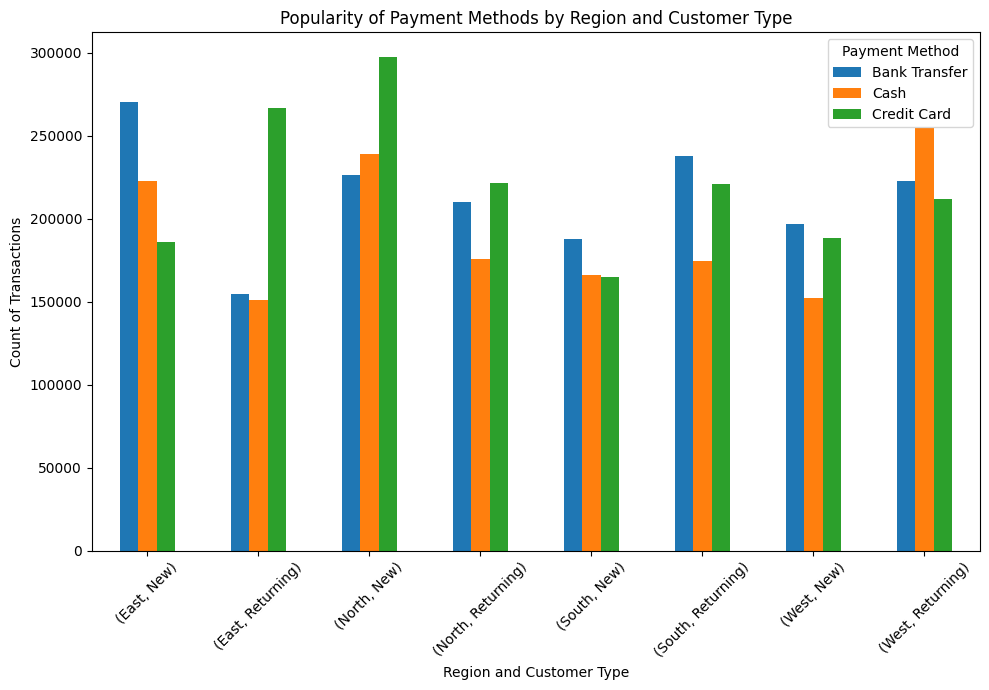

In [53]:
pivot_df = payment_method_popularity.pivot_table(index=['Region', 'Customer_Type'], columns='Payment_Method', values='Sales_Amount', fill_value=0)

pivot_df.plot(kind='bar', stacked=False, figsize=(10, 7))
plt.title('Popularity of Payment Methods by Region and Customer Type')
plt.xlabel('Region and Customer Type')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

In [54]:
return_rate_of_cust = df.groupby(['Customer_Type', 'Region'])['Customer_Type'].count().reset_index(name= 'Count')
return_rate_of_cust

,Customer_Type,Region,Count
0,New,East,138
1,New,North,145
2,New,South,104
3,New,West,116
4,Returning,East,124
5,Returning,North,122
6,Returning,South,121
7,Returning,West,127


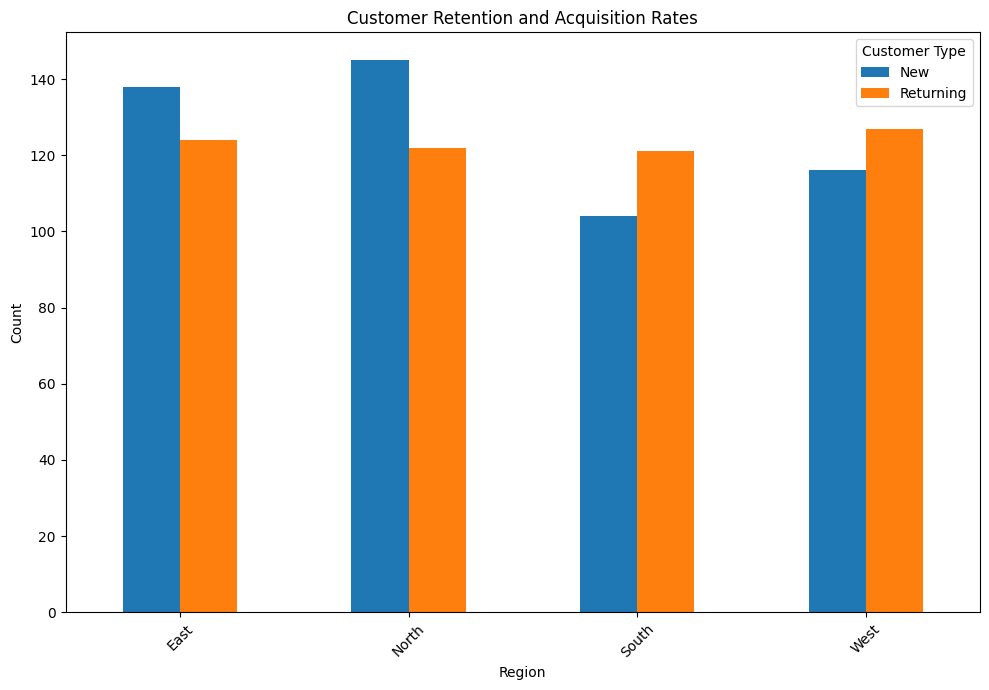

In [55]:
pivot_df = return_rate_of_cust.pivot_table(index=['Region'], columns='Customer_Type', values='Count', fill_value=0)

pivot_df.plot(kind='bar', stacked=False, figsize=(10, 7))
plt.title('Customer Retention and Acquisition Rates')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()